<h1 align=center>Car Fare Prediction</h1>

In [1]:
## Load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
## Read data in pandas dataframe, using nrows for exploration, then chunksize for later processing.
train_df =  pd.read_csv('train_cab.csv',parse_dates=["pickup_datetime"])

## List first few rows (datapoints)
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
## Read data in pandas dataframe
test_df =  pd.read_csv('test.csv', parse_dates=["pickup_datetime"])
test_df.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


## 1. Data Wrangling

In [4]:
## Check datatypes
train_df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [5]:
## Check statistics of the features
train_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [6]:
test_df.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [7]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


### First observations

- There are negative fares.  
- Is there any missing data? 
- How can there be 0 passengers?
- To be useful for exploration and prediction, I'll need to convert the dates from a timestamp object to individual colums for different aspects like, hour of the day, month, year, etc.

### 1. (a) Missing Values

In [8]:
# Replace missing passenger_count values with median of passenger_count column
train_df[train_df.passenger_count.isnull()].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
31,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,NaN
64,7.3,2011-11-07 10:47:40 UTC,-74.003919,40.753019,-73.992368,40.735362,NaN
82,8.5,2013-06-14 08:27:43 UTC,-73.953710,40.790813,-73.957015,40.777676,NaN
97,9,2014-12-07 12:26:00 UTC,-73.984977,40.752122,-74.000925,40.757982,NaN
112,35,2012-12-06 18:05:00 UTC,-73.953310,40.787772,-73.944352,40.719772,NaN


In [9]:
train_df.loc[train_df.passenger_count.isnull(),['passenger_count']] = train_df.passenger_count.median()

In [10]:
### remove records that contain NaN value
train_df = train_df.dropna(how = 'any', axis = 'rows')
test_df = test_df.dropna(how = 'any', axis = 'rows')

In [11]:
train_df.count()

fare_amount          16043
pickup_datetime      16043
pickup_longitude     16043
pickup_latitude      16043
dropoff_longitude    16043
dropoff_latitude     16043
passenger_count      16043
dtype: int64

In [12]:
test_df.count()

pickup_datetime      9914
pickup_longitude     9914
pickup_latitude      9914
dropoff_longitude    9914
dropoff_latitude     9914
passenger_count      9914
dtype: int64

In [13]:
# There is a row with fare_amount = '430-', removing that row as it prevents covertion of fare_amount to float dtype

In [14]:
train_df = train_df[train_df['fare_amount'] != '430-']
train_df.count()

fare_amount          16042
pickup_datetime      16042
pickup_longitude     16042
pickup_latitude      16042
dropoff_longitude    16042
dropoff_latitude     16042
passenger_count      16042
dtype: int64

### 1. (b) Fixing Data Types & Removing Incorrect Data

In [15]:
### change dtype of fare_amount to float
train_df['fare_amount'] = train_df['fare_amount'].values.astype(np.float64)

In [16]:
#Remove rows fare_amount less than 0 and passenger count less than 0
train_df = train_df[(train_df['fare_amount'] > 0) & (train_df['passenger_count'] >= 1)]
test_df = test_df[test_df['passenger_count'] > 0]

In [17]:
train_df.count()

fare_amount          15980
pickup_datetime      15980
pickup_longitude     15980
pickup_latitude      15980
dropoff_longitude    15980
dropoff_latitude     15980
passenger_count      15980
dtype: int64

### 1. (c) Outlier Ananlysis

In [18]:
# Calculating Inter Quartile Range of train_df
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


fare_amount          6.500000
pickup_longitude     0.025320
pickup_latitude      0.032420
dropoff_longitude    0.027535
dropoff_latitude     0.033295
passenger_count      1.000000
dtype: float64


In [19]:
# Removing outliers from train_df
df_out = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(12075, 7)

In [20]:
df_out.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,12075.000000,12075.000000,12075.000000,12075.000000,12075.000000,12075.000000
mean,8.659131,-73.981782,40.752715,-73.980625,40.752996,1.254079
std,3.897290,0.016149,0.021586,0.017014,0.022848,0.532875
min,0.010000,-74.018108,40.686846,-74.019535,40.684917,1.000000
25%,5.700000,-73.992857,40.738247,-73.992026,40.738372,1.000000
50%,7.700000,-73.982738,40.753295,-73.981986,40.754446,1.000000
75%,10.500000,-73.971341,40.766750,-73.970264,40.767369,1.000000
max,22.100000,-73.929460,40.815984,-73.922377,40.817875,3.000000


### 1. (d) Preprocessing Data: Deriving Meaningful Variables

In [21]:
import matplotlib

Text(0.5, 1.0, 'Dropoff locations')

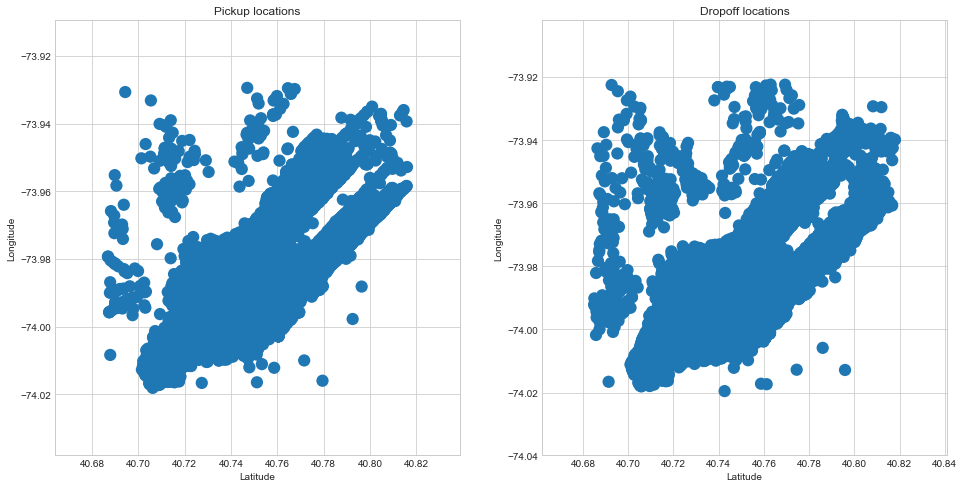

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)

axs[0].scatter(df_out['pickup_latitude'], df_out['pickup_longitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[0].set_title('Pickup locations')


axs[1].scatter(df_out['dropoff_latitude'], df_out['dropoff_longitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
axs[1].set_title('Dropoff locations')


## HDBSCAN Clustering of Geo Locations

In [23]:
import hdbscan

In [24]:
X = df_out[['pickup_latitude','pickup_longitude']]

In [25]:
X.shape

(12075, 2)

In [26]:
Y = df_out[['dropoff_latitude','dropoff_longitude']]
Y.shape

(12075, 2)

In [27]:
xval = np.append(X.pickup_latitude.values, Y.dropoff_latitude.values)
xval
len(xval)

24150

In [28]:
yval = np.append(X.pickup_longitude.values, Y.dropoff_longitude.values)
yval
len(yval)

24150

In [29]:
Z = pd.DataFrame({'lat':xval,'lon':yval})
Z.head()

,lat,lon
0,40.711303,-74.016048
1,40.761270,-73.982738
2,40.733143,-73.987130
3,40.768008,-73.968095
4,40.731630,-74.000964


In [30]:
Z.shape

(24150, 2)

In [31]:
rads = np.radians(Z)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine',prediction_data=True).fit(rads)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [32]:
# There is one 'pickup_datetime' that is 43
df_out = df_out[df_out['pickup_datetime'] != '43'] 

In [33]:
### function that get a clusterer, using HDBScan technique
def add_cluster(df):
    
    ### predict cluster
    pickup_area = hdbscan.approximate_predict(clusterer, np.radians(df[['pickup_latitude', 'pickup_longitude']].values))[0]
    dropoff_area = hdbscan.approximate_predict(clusterer, np.radians(df[['dropoff_latitude', 'dropoff_longitude']].values))[0]

    df['pickup_area'] = pickup_area
    df['dropoff_area'] = dropoff_area

    del pickup_area
    del dropoff_area
  
    return df

In [34]:
### function that calcuates distance between two locations
def getDistance(lat1,lon1,lat2,lon2):
    r = 6373 # earth's radius
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(lon1)
    lat2 = np.deg2rad(lat2)
    lon2 = np.deg2rad(lon2)
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = r*c
    
    return distance


### function that calculates distance between pickup location and dropoff location
def add_dist(df):
    df['distance'] = getDistance(df.pickup_latitude, df.pickup_longitude, 
                                      df.dropoff_latitude, df.dropoff_longitude)
    return df

### function that splits datetime into categorical data
def add_datetime(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
    df['year'] = df.pickup_datetime.dt.year
    df['month'] = df.pickup_datetime.dt.month
    df['day'] = df.pickup_datetime.dt.day
    df['hour'] = df.pickup_datetime.dt.hour
    df['dayOfWeek'] = df.pickup_datetime.dt.dayofweek
    
    return df

### function that convert latitudes and longtitudes to radians format
def convert_to_radians(df):
    df['pickup_latitude'] = np.deg2rad(df['pickup_latitude'].values)
    df['pickup_longitude'] = np.deg2rad(df['pickup_longitude'].values)
    df['dropoff_latitude'] = np.deg2rad(df['dropoff_latitude'].values)
    df['dropoff_longitude'] = np.deg2rad(df['dropoff_longitude'].values)
    return df
  
### function that preprocess data before training the model
def preprocess_data(df):

    df = add_cluster(df)
    df = add_dist(df)
    df = add_datetime(df)
    df = convert_to_radians(df)
    
    return df

In [35]:
df = preprocess_data(df_out)
test_df = preprocess_data(test_df)

In [36]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,dropoff_area,distance,year,month,day,hour,dayOfWeek
1,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1.0,918,-1,8.452786,2010,1,5,16,1
2,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2.0,-1,-1,1.389961,2011,8,18,0,3
3,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1.0,-1,5252,2.800149,2012,4,21,4,5
4,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1.0,-1,2339,1.999784,2010,3,9,7,1
5,12.1,2011-01-06 09:50:45,-1.291560,0.710901,-1.291071,0.711365,1.0,3934,6875,3.788428,2011,1,6,9,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 1 to 16066
Data columns (total 15 columns):
fare_amount          12074 non-null float64
pickup_datetime      12074 non-null datetime64[ns]
pickup_longitude     12074 non-null float64
pickup_latitude      12074 non-null float64
dropoff_longitude    12074 non-null float64
dropoff_latitude     12074 non-null float64
passenger_count      12074 non-null float64
pickup_area          12074 non-null int32
dropoff_area         12074 non-null int32
distance             12074 non-null float64
year                 12074 non-null int64
month                12074 non-null int64
day                  12074 non-null int64
hour                 12074 non-null int64
dayOfWeek            12074 non-null int64
dtypes: datetime64[ns](1), float64(7), int32(2), int64(5)
memory usage: 1.4 MB


In [38]:
test_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,dropoff_area,distance,year,month,day,hour,dayOfWeek
0,2015-01-27 13:08:24+00:00,-1.291078,0.711463,-1.291220,0.711114,1,-1,5181,2.323989,2015,1,27,13,1
1,2015-01-27 13:08:24+00:00,-1.291314,0.710687,-1.291524,0.711033,1,3040,-1,2.426114,2015,1,27,13,1
2,2011-10-08 11:53:44+00:00,-1.291239,0.711244,-1.291189,0.711154,1,5361,-1,0.618822,2011,10,8,11,5
3,2012-12-01 21:12:12+00:00,-1.291215,0.711532,-1.291377,0.711250,1,5791,-1,1.961648,2012,12,1,21,5
4,2012-12-01 21:12:12+00:00,-1.290951,0.711916,-1.291344,0.711124,1,-1,-1,5.388992,2012,12,1,21,5


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 14 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
pickup_area          9914 non-null int32
dropoff_area         9914 non-null int32
distance             9914 non-null float64
year                 9914 non-null int64
month                9914 non-null int64
day                  9914 non-null int64
hour                 9914 non-null int64
dayOfWeek            9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int32(2), int64(6)
memory usage: 1.1 MB


## 2. Exploratory Data Analysis

In [40]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,dropoff_area,distance,year,month,day,hour,dayOfWeek
fare_amount,1.000000,-0.062386,-0.075212,0.008967,-0.088434,0.020483,-0.023860,-0.049592,0.817396,0.153205,0.036309,-0.015379,0.002953,0.006747
pickup_longitude,-0.062386,1.000000,0.674762,0.403841,0.340992,-0.040885,-0.014614,-0.015334,-0.062347,-0.005914,-0.004403,0.006956,0.017926,-0.064265
pickup_latitude,-0.075212,0.674762,1.000000,0.315343,0.517528,-0.021762,0.020312,-0.001458,-0.074461,-0.005012,0.004351,-0.003095,0.045932,-0.070694
dropoff_longitude,0.008967,0.403841,0.315343,1.000000,0.611156,-0.025373,-0.010059,-0.048436,0.043211,0.010444,0.008403,0.005815,-0.002979,-0.038515
dropoff_latitude,-0.088434,0.340992,0.517528,0.611156,1.000000,-0.009078,0.006502,0.017809,-0.045074,0.001117,0.015116,0.006331,0.035498,-0.045013
passenger_count,0.020483,-0.040885,-0.021762,-0.025373,-0.009078,1.000000,-0.002854,0.018234,0.007974,-0.022965,0.017870,0.001735,0.040876,0.077151
pickup_area,-0.023860,-0.014614,0.020312,-0.010059,0.006502,-0.002854,1.000000,0.022241,-0.042811,0.008093,0.008956,-0.014137,0.027414,-0.014422
dropoff_area,-0.049592,-0.015334,-0.001458,-0.048436,0.017809,0.018234,0.022241,1.000000,-0.070187,-0.010289,0.007425,-0.007946,-0.017069,-0.010724
distance,0.817396,-0.062347,-0.074461,0.043211,-0.045074,0.007974,-0.042811,-0.070187,1.000000,-0.020079,0.006953,-0.006590,-0.021487,0.027055
year,0.153205,-0.005914,-0.005012,0.010444,0.001117,-0.022965,0.008093,-0.010289,-0.020079,1.000000,-0.113680,-0.036748,0.003631,0.003915


In [41]:
df[['fare_amount', 'passenger_count', 'distance', 'year', 'month', 'day', 'dayOfWeek', 'hour']].corr()  

,fare_amount,passenger_count,distance,year,month,day,dayOfWeek,hour
fare_amount,1.000000,0.020483,0.817396,0.153205,0.036309,-0.015379,0.006747,0.002953
passenger_count,0.020483,1.000000,0.007974,-0.022965,0.017870,0.001735,0.077151,0.040876
distance,0.817396,0.007974,1.000000,-0.020079,0.006953,-0.006590,0.027055,-0.021487
year,0.153205,-0.022965,-0.020079,1.000000,-0.113680,-0.036748,0.003915,0.003631
month,0.036309,0.017870,0.006953,-0.113680,1.000000,-0.013523,-0.019027,-0.006016
day,-0.015379,0.001735,-0.006590,-0.036748,-0.013523,1.000000,0.014382,0.003558
dayOfWeek,0.006747,0.077151,0.027055,0.003915,-0.019027,0.014382,1.000000,-0.079006
hour,0.002953,0.040876,-0.021487,0.003631,-0.006016,0.003558,-0.079006,1.000000


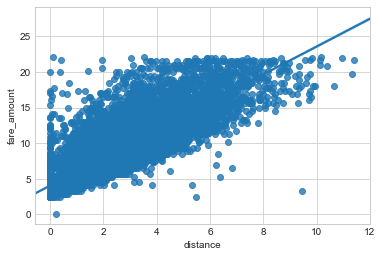

In [42]:
# Distance as potential predictor variable of price
sns.regplot(x="distance", y="fare_amount", data=df)

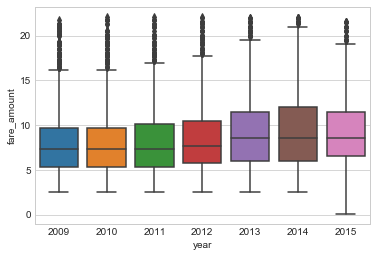

In [43]:
sns.boxplot(x="year", y="fare_amount", data=df)

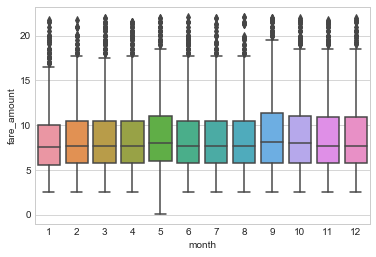

In [44]:
sns.boxplot(x="month", y="fare_amount", data=df)

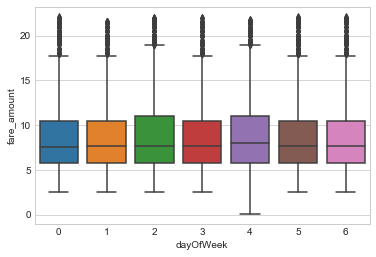

In [45]:
sns.boxplot(x="dayOfWeek", y="fare_amount", data=df)

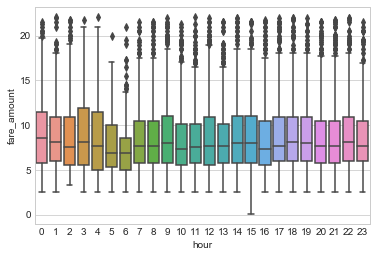

In [46]:
sns.boxplot(x="hour", y="fare_amount", data=df)

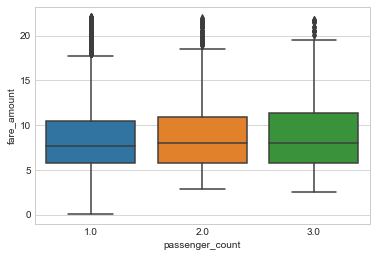

In [47]:
sns.boxplot(x="passenger_count", y="fare_amount", data=df)

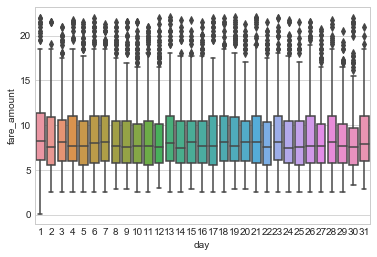

In [48]:
sns.boxplot(x="day", y="fare_amount", data=df)

## Descriptive Data Analysis

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [49]:
from scipy import stats

#### Distance vs Fare Amount

In [50]:
pearson_coef, p_value = stats.pearsonr(df['distance'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8173958259790548  with a P-value of P = 0.0


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between distance and fare_amount is statistically significant, and the linear relationship is quite strong  (~0.817)</p>

#### Passenger Count vs Fare Amount

In [51]:
pearson_coef, p_value = stats.pearsonr(df['passenger_count'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.020482751722054396  with a P-value of P = 0.024405573191664316


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.05, the correlation between passenger_count and fare_amount is moderately statistically significant, although the linear relationship is not strong  (~0.0206)</p>

#### Year vs Fare Amount

In [52]:
pearson_coef, p_value = stats.pearsonr(df['year'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1532048065741268  with a P-value of P = 2.581710503822414e-64


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between year and fare_amount is 
statistically significant, although the linear relationship is not strong  (~0.153)</p>

#### Month vs Fare Amount

In [53]:
pearson_coef, p_value = stats.pearsonr(df['month'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.03630885370321544  with a P-value of P = 6.591101282368265e-05


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between month and fare_amount is 
statistically significant, although the linear relationship is not strong  (~0.0368)</p>

#### Day vs Fare Amount

In [54]:
pearson_coef, p_value = stats.pearsonr(df['day'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.01537874550043388  with a P-value of P = 0.09107225196478452


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.1, the correlation between day and fare_amount is slightly 
statistically significant, and the linear relationship is not strong  (~-0.015)</p>

#### DayOfWeek vs Fare Amount

In [55]:
pearson_coef, p_value = stats.pearsonr(df['dayOfWeek'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.00674679522960945  with a P-value of P = 0.4585228494588428


<h5>Conclusion:</h5>
<p>Since the p-value is $>$ 0.1, the correlation between DayOfMonth and fare_amount is not 
statistically significant, and the linear relationship is not strong  (~0.007)</p>

#### Hour vs Fare Amount

In [56]:
pearson_coef, p_value = stats.pearsonr(df['hour'], df['fare_amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.0029528293187471746  with a P-value of P = 0.745613130004831


<h5>Conclusion:</h5>
<p>Since the p-value is $>$ 0.1, the correlation between hour and fare_amount is not 
statistically significant, and the linear relationship is not strong  (~0.003)</p>

### Conclusion: Important Variables

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the fare_amount. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Distance</li>
</ul>
    
Categorical variables:
<ul>
    <li>Year</li>
    <li>Month</li>
    <li>Day</li>
    <li>Passenger Count</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

### Feature Selection

In [57]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [58]:
X = df[df.columns[2:]]
Y = df['fare_amount']

In [59]:
# Feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[  1.345   1.731   1.294   2.241   1.003   1.249   1.096 225.843 114.529
   1.764   0.983   1.579   0.88 ]
[[7.118e-01 8.453e+00 2.010e+03 1.000e+00]
 [7.112e-01 1.390e+00 2.011e+03 8.000e+00]
 [7.114e-01 2.800e+00 2.012e+03 4.000e+00]
 [7.118e-01 2.000e+00 2.010e+03 3.000e+00]
 [7.114e-01 3.788e+00 2.011e+03 1.000e+00]]


 ### Recursive Feature Elimination

In [60]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
# Feature extraction
model = LinearRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False  True  True False False False False False False False False
 False]
Feature Ranking: [ 1  2  1  1  5 11 10  3  4  6  9  8  7]


In [62]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,dropoff_area,distance,year,month,day,hour,dayOfWeek
1,-1.291824,0.710546,-1.291182,0.711780,1.0,918,-1,8.452786,2010,1,5,16,1
2,-1.291242,0.711418,-1.291391,0.711231,2.0,-1,-1,1.389961,2011,8,18,0,3
3,-1.291319,0.710927,-1.291396,0.711363,1.0,-1,5252,2.800149,2012,4,21,4,5
4,-1.290987,0.711536,-1.290787,0.711811,1.0,-1,2339,1.999784,2010,3,9,7,1
5,-1.291560,0.710901,-1.291071,0.711365,1.0,3934,6875,3.788428,2011,1,6,9,3


### Ridge Regression

In [63]:
# First things first
from sklearn.linear_model import Ridge

In [64]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [66]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.134 * X0 + -0.264 * X1 + -0.395 * X2 + -1.005 * X3 + 0.127 * X4 + 0.0 * X5 + 0.0 * X6 + 1.964 * X7 + 0.366 * X8 + 0.056 * X9 + -0.001 * X10 + 0.011 * X11 + -0.03 * X12


## Model Development

### 1. Multiple Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [71]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lm.intercept_

-471.2254132366043

In [73]:
lm.coef_

array([-8.339e+01,  2.536e+02,  7.285e+01, -6.418e+02,  1.373e-01,
        2.148e-05,  1.624e-05,  1.950e+00,  3.664e-01,  5.101e-02,
        6.217e-05,  9.048e-03, -3.347e-02])

In [74]:
Yhat = lm.predict(x_test)

In [75]:
# Use score method to get accuracy of model
score = lm.score(x_test, y_test)
print(score)

0.713794747092104


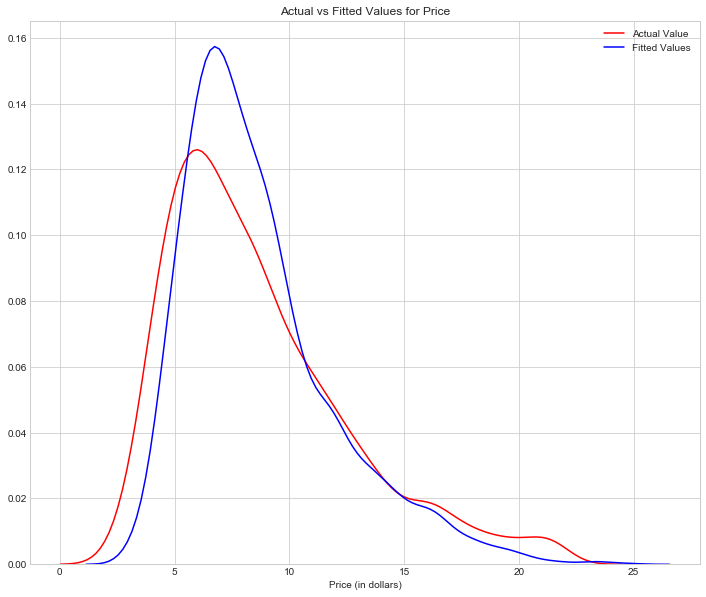

In [76]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

### 2. Random Forest Regression 

In [77]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [79]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [80]:
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [81]:
predictions = regressor.predict(x_test)

In [82]:
# Use score method to get accuracy of model
score = regressor.score(x_test, y_test)
print(score)

0.7405938411585025


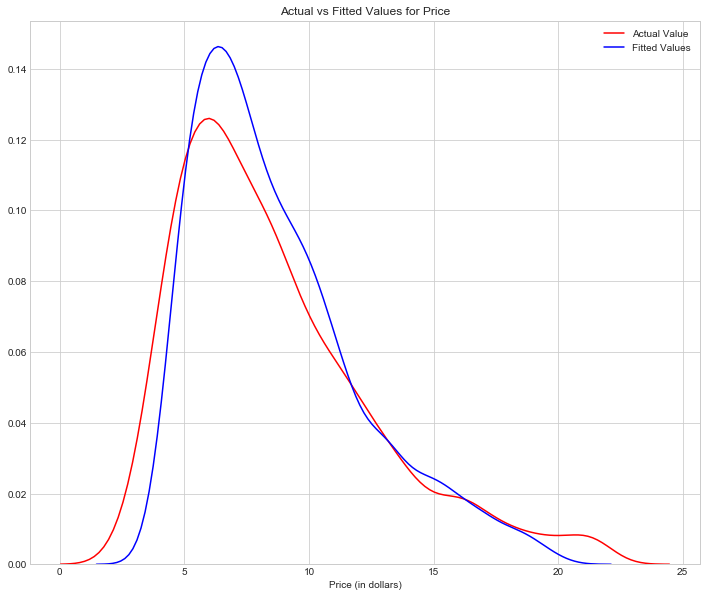

In [83]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')


plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. This is better than the linear regression model.However, there is definitely some room for improvement.</p>

### 3. Gradient Boosting: Lightgbm

In [84]:
import lightgbm as lgbm

In [85]:
### function that change data type to prevent memory surge from Lightgbm python package
def change_data_type(df):
    df['passenger_count'] = df['passenger_count'].values.astype(np.float32)
    df['year'] = df['year'].values.astype(np.float32)
    df['month'] = df['month'].values.astype(np.float32)
    df['day'] = df['day'].values.astype(np.float32)
    df['hour'] = df['hour'].values.astype(np.float32)
    df['dayOfWeek'] = df['dayOfWeek'].values.astype(np.float32)
    return df

In [86]:
df = change_data_type(df)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [87]:
### create lightgbm dataset
train_set = lgbm.Dataset(x_train, y_train, silent=False, categorical_feature=['year','month','day','dayOfWeek','hour'])
test_set = lgbm.Dataset(x_test, y_test, silent=False, categorical_feature=['year','month','day','dayOfWeek','hour'])

In [88]:
### parameter for lightgbm model
params = {
    'boosting_type':'gbdt',
    'objective': 'regression',
    'nthread':16,
    'num_leaves': 31,
    'learning_rate': 0.03,
    'max_depth': 500,
    'subsample': 0.8,
    'bagging_fraction' : 1,
    'max_bin' : 5000 ,
    'bagging_freq': 30,
    'colsample_bytree': 0.6,
    'metric': 'rmse',
    'min_split_gain': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 10,
    'scale_pos_weight':1,
    'zero_as_missing': False,
    'seed':0,
    'num_rounds':60000,
}

In [89]:
### train the model
model = lgbm.train(params, train_set = train_set, valid_sets=test_set, num_boost_round=5000,early_stopping_rounds=500,verbose_eval=100)

C:\Users\Welcome\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Welcome\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\Welcome\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.11222
[200]	valid_0's rmse: 1.95722
[300]	valid_0's rmse: 1.9307
[400]	valid_0's rmse: 1.91772
[500]	valid_0's rmse: 1.9133
[600]	valid_0's rmse: 1.91138
[700]	valid_0's rmse: 1.90678
[800]	valid_0's rmse: 1.90382
[900]	valid_0's rmse: 1.90163
[1000]	valid_0's rmse: 1.9014
[1100]	valid_0's rmse: 1.9014
[1200]	valid_0's rmse: 1.9014
[1300]	valid_0's rmse: 1.9014
[1400]	valid_0's rmse: 1.9014
Early stopping, best iteration is:
[905]	valid_0's rmse: 1.90135


In [90]:
model.best_score

defaultdict(dict, {'valid_0': {'rmse': 1.9013540632844097}})

In [91]:
predict = model.predict(x_test)

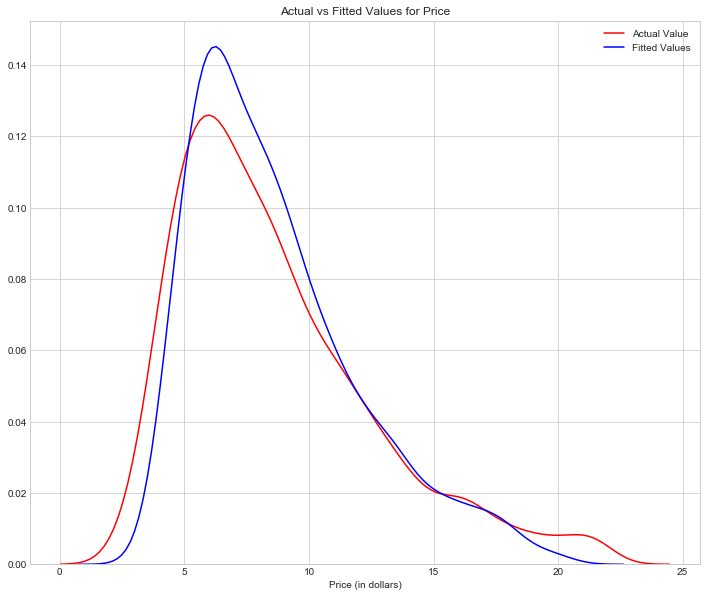

In [92]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')


plt.show()
plt.close()

In [93]:
import pickle

### save trained model
with open("lightbgm_car_fare.pkl", 'wb') as pickle_file:
    pickle.dump(model, pickle_file)

## Model Selection/ Evaluation

In [94]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### 1. Linear Regression

### >> R-square Error

In [95]:
print('The R-square is: ', lm.score(x_test, y_test))

The R-square is:  0.713794747092104


### >>Cross Validation

In [96]:
Rcross = cross_val_score(lm, X, Y, cv=4)

In [97]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7024363685502308 and the standard deviation is 0.00432234428616818


### >>Mean Square Error(MSE)

In [98]:
mse = mean_squared_error(y_test, lm.predict(x_test))
print('The mean square error(MSE) of price and predicted value using multifit is: ', mse)

The mean square error(MSE) of price and predicted value using multifit is:  4.540229932701916


### >>Root Mean Square Error (RMSE)

In [99]:
rmse = math.sqrt(mse)
print('The Root mean square error(RMSE) of price and predicted value using multifit is: ', rmse)

The Root mean square error(RMSE) of price and predicted value using multifit is:  2.130781530965086


<hr>


### 2. Random Forest

### >>R-Square Error

In [100]:
print('The R-square is: ', regressor.score(x_test, y_test))

The R-square is:  0.7405938411585025


### >>Cross Validation

In [101]:
Rcross = cross_val_score(regressor, X, Y, cv=4)

In [102]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7347222833972608 and the standard deviation is 0.004699891430294816


### >>Mean Square Error(MSE)

In [103]:
mse = mean_squared_error(y_test, regressor.predict(x_test))
print('The mean square error(MSE) of price and predicted value using multifit is: ', mse)

The mean square error(MSE) of price and predicted value using multifit is:  4.115101295776747


### >>Root Mean Square Error (RMSE)

In [104]:
rmse = math.sqrt(mse)
print('The Root mean square error(RMSE) of price and predicted value using multifit is: ', rmse)

The Root mean square error(RMSE) of price and predicted value using multifit is:  2.0285712449349043


<hr>

### 3. Gradient Boosting: lightgbm

### >> Mean Square Error(MSE)

In [106]:
mse = mean_squared_error(y_test, model.predict(x_test))
print('The mean square error(MSE) of price and predicted value using multifit is: ', mse)

The mean square error(MSE) of price and predicted value using multifit is:  3.615147251668539


### >>Root Mean Square Error (RMSE)

In [108]:
import math
rmse = math.sqrt(mse)
print('The Root mean square error(RMSE) of price and predicted value using multifit is: ', rmse)

The Root mean square error(RMSE) of price and predicted value using multifit is:  1.901354057420274


## Conclusion
<p><b>Gradient Boosting: lightgbm model is producing the least RMSE, hence we will select this model</b></p>

In [109]:
test_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,dropoff_area,distance,year,month,day,hour,dayOfWeek
0,2015-01-27 13:08:24+00:00,-1.291078,0.711463,-1.291220,0.711114,1,-1,5181,2.323989,2015,1,27,13,1
1,2015-01-27 13:08:24+00:00,-1.291314,0.710687,-1.291524,0.711033,1,3040,-1,2.426114,2015,1,27,13,1
2,2011-10-08 11:53:44+00:00,-1.291239,0.711244,-1.291189,0.711154,1,5361,-1,0.618822,2011,10,8,11,5
3,2012-12-01 21:12:12+00:00,-1.291215,0.711532,-1.291377,0.711250,1,5791,-1,1.961648,2012,12,1,21,5
4,2012-12-01 21:12:12+00:00,-1.290951,0.711916,-1.291344,0.711124,1,-1,-1,5.388992,2012,12,1,21,5


In [110]:
key = test_df['pickup_datetime']
test = test_df[test_df.columns[1:]]

In [112]:
### predict value
prediction = model.predict(test, num_iteration = model.best_iteration)

submission = pd.DataFrame({
    "key": key,
    "fare_amount": prediction
})

submission.to_csv('submission.csv',index=False)